In [3]:
import pandas as pd
import numpy as np
import datetime as dt
!pip install yfinance
import yfinance as yf
start = dt.datetime(2017,5,29).date()
end = dt.datetime(2020,6,29).date()

tickers=['TCS.NS', 'INFY.NS', 'WIPRO.NS']

DF =pd.DataFrame()

for i in tickers:
    df = yf.download(i,start,end)[['Adj Close']].pct_change()
    df.columns = [i]                         
    DF = pd.concat([DF,df],axis =1)

df = DF.copy().round(5)
df

  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22622 sha256=cbe517c3a866fc79f7c97fbc2d598929c746e3a5989c7846b717c93e4fcd6611
  Stored in directory: c:\users\ravi\appdata\local\pip\cache\wheels\b4\c3\39\9c01ae2b4726f37024bba5592bec868b47a2fab5a786e8979a
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8372 sha256=3007fda40a5695f82317e707d4bcb1dbe1fa4f0162d444040185308a96647afa
  Stored in directory: c:\users\ravi\appdata\local\pip\cache\wheels\57\6d\a3\a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,TCS.NS,INFY.NS,WIPRO.NS
Date,,,
2017-05-29,NaN,NaN,NaN
2017-05-30,-0.00845,0.01122,0.00290
2017-05-31,-0.00176,-0.01922,-0.00121
2017-06-01,0.00275,0.00946,0.01055
2017-06-02,0.00442,-0.00201,0.01940
...,...,...,...
2020-06-22,-0.00814,-0.00262,-0.01801
2020-06-23,0.00362,0.02409,0.01169
2020-06-24,0.00339,-0.00902,-0.01088


In [4]:
mean_returns = df.mean() 
cov_matrix = df.cov()




print(mean_returns)
print(cov_matrix)

TCS.NS      0.000908
INFY.NS     0.000875
WIPRO.NS    0.000303
dtype: float64
            TCS.NS   INFY.NS  WIPRO.NS
TCS.NS    0.000295  0.000178  0.000123
INFY.NS   0.000178  0.000365  0.000128
WIPRO.NS  0.000123  0.000128  0.000270


In [5]:
num_runs = 10000 # number of rows/iterations
result = np.zeros((num_runs,(len(tickers)+3)))
result

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [6]:
for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(tickers))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_return = portfolio_return * 252
    
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
    portfolio_std_dev = portfolio_std_dev * np.sqrt(252)
    
    Sharpe = portfolio_return /  portfolio_std_dev
    
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] =  portfolio_return
    result[i,1] = portfolio_std_dev
    result[i,2] = Sharpe
    
    for j in range(len(tickers)):
        result[i,j+3]= weights[j]

In [7]:
result

array([[0.1900749 , 0.22882532, 0.830655  , 0.56072334, 0.19559877,
        0.24367788],
       [0.12922759, 0.23257668, 0.55563436, 0.01543008, 0.35072538,
        0.63384454],
       [0.12720234, 0.22663943, 0.56125424, 0.14658974, 0.19772551,
        0.65568476],
       ...,
       [0.18313742, 0.22978341, 0.79700019, 0.2886872 , 0.43559492,
        0.27571788],
       [0.16465501, 0.22252075, 0.73995353, 0.2686996 , 0.32843258,
        0.40286782],
       [0.18958426, 0.24417943, 0.77641374, 0.17160148, 0.60438823,
        0.22401029]])

In [8]:
# Converting 'result' into a DataFrame
columns = ['mean','sd','Sharpe'] + tickers
columns

['mean', 'sd', 'Sharpe', 'TCS.NS', 'INFY.NS', 'WIPRO.NS']

In [9]:
result = pd.DataFrame(result,columns=columns)
result

,mean,sd,Sharpe,TCS.NS,INFY.NS,WIPRO.NS
0,0.190075,0.228825,0.830655,0.560723,0.195599,0.243678
1,0.129228,0.232577,0.555634,0.015430,0.350725,0.633845
2,0.127202,0.226639,0.561254,0.146590,0.197726,0.655685
3,0.165247,0.230604,0.716581,0.140796,0.468029,0.391174
4,0.211158,0.240369,0.878475,0.518217,0.387020,0.094763
...,...,...,...,...,...,...
9995,0.154311,0.220906,0.698535,0.261534,0.264197,0.474269
9996,0.222865,0.256229,0.869788,0.409514,0.583457,0.007029
9997,0.183137,0.229783,0.797000,0.288687,0.435595,0.275718
9998,0.164655,0.222521,0.739954,0.268700,0.328433,0.402868


In [11]:
Max_Sharpe = result.iloc[result['Sharpe'].idxmax()]
print(Max_Sharpe)

Min_SD = result.iloc[result['sd'].idxmin()]
print(Min_SD)

mean        0.225691
sd          0.251000
Sharpe      0.899168
TCS.NS      0.629898
INFY.NS     0.369627
WIPRO.NS    0.000475
Name: 5047, dtype: float64
mean        0.156375
sd          0.220060
Sharpe      0.710601
TCS.NS      0.336114
INFY.NS     0.199526
WIPRO.NS    0.464360
Name: 7345, dtype: float64


In [12]:
result.iloc[5047]

mean        0.169931
sd          0.221485
Sharpe      0.767235
TCS.NS      0.364305
INFY.NS     0.263792
WIPRO.NS    0.371903
Name: 9899, dtype: float64

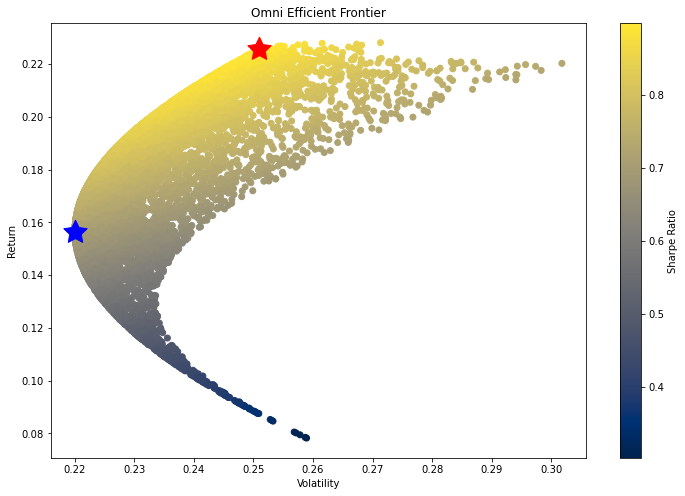

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
plt.scatter(x=result['sd'],y=result['mean'],c=result['Sharpe'],cmap='cividis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.title('Omni Efficient Frontier')
#Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
plt.scatter(Max_Sharpe[1],Max_Sharpe[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(Min_SD[1],Min_SD[0],marker=(5,1,0),color='b',s=600)
plt.show()

In [54]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
start = dt.datetime(2017,5,29).date()
end = dt.datetime(2020,6,29).date()

tickers=['MARUTI.NS', 'HEROMOTOCO.NS', 'M&M.NS']
DF =pd.DataFrame()

for i in tickers:
    df = yf.download(i,start,end)[['Adj Close']].pct_change()
    df.columns = [i]                         
    DF = pd.concat([DF,df],axis =1)

df = DF.copy().round(5)
df


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,MARUTI.NS,HEROMOTOCO.NS,M&M.NS
Date,,,
2017-05-29,NaN,NaN,NaN
2017-05-30,0.00183,0.02034,0.00077
2017-05-31,0.00888,0.00136,0.04103
2017-06-01,-0.00893,-0.00323,0.00586
2017-06-02,-0.00446,0.03118,-0.00474
...,...,...,...
2020-06-22,-0.00023,0.02409,-0.00260
2020-06-23,-0.00161,0.00259,0.03539
2020-06-24,-0.02228,0.03099,-0.00203


In [55]:
mean_returns = df.mean() 
cov_matrix = df.cov()




print(mean_returns)
print(cov_matrix)

MARUTI.NS       -2.248677e-07
HEROMOTOCO.NS   -1.133598e-04
M&M.NS          -1.311243e-04
dtype: float64
               MARUTI.NS  HEROMOTOCO.NS    M&M.NS
MARUTI.NS       0.000458       0.000266  0.000254
HEROMOTOCO.NS   0.000266       0.000433  0.000215
M&M.NS          0.000254       0.000215  0.000465


In [56]:
num_runs = 10000 # number of rows/iterations
result = np.zeros((num_runs,(len(tickers)+3)))
result

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [57]:
for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(tickers))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_return = portfolio_return * 252
    
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
    portfolio_std_dev = portfolio_std_dev * np.sqrt(252)
    
    Sharpe = portfolio_return /  portfolio_std_dev
    
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] =  portfolio_return
    result[i,1] = portfolio_std_dev
    result[i,2] = Sharpe
    
    for j in range(len(tickers)):
        result[i,j+3]= weights[j]

In [58]:
result

array([[-0.02709847,  0.3056235 , -0.08866618,  0.06961949,  0.81497046,
         0.11541005],
       [-0.01919275,  0.28360632, -0.06767392,  0.36198317,  0.42664894,
         0.21136789],
       [-0.02540012,  0.28385843, -0.08948165,  0.1887097 ,  0.31682259,
         0.49446771],
       ...,
       [-0.02647898,  0.28270541, -0.09366281,  0.13401724,  0.47883162,
         0.38715114],
       [-0.0166699 ,  0.29424833, -0.0566525 ,  0.42529511,  0.52368492,
         0.05101997],
       [-0.01493459,  0.29119223, -0.05128773,  0.53093824,  0.13288045,
         0.3361813 ]])

In [59]:
# Converting 'result' into a DataFrame
columns = ['mean','sd','Sharpe'] + tickers
columns

['mean', 'sd', 'Sharpe', 'MARUTI.NS', 'HEROMOTOCO.NS', 'M&M.NS']

In [60]:
result = pd.DataFrame(result,columns=columns)
result

,mean,sd,Sharpe,MARUTI.NS,HEROMOTOCO.NS,M&M.NS
0,-0.027098,0.305623,-0.088666,0.069619,0.814970,0.115410
1,-0.019193,0.283606,-0.067674,0.361983,0.426649,0.211368
2,-0.025400,0.283858,-0.089482,0.188710,0.316823,0.494468
3,-0.012051,0.300926,-0.040048,0.632413,0.029191,0.338396
4,-0.024638,0.281657,-0.087474,0.190753,0.472081,0.337166
...,...,...,...,...,...,...
9995,-0.027918,0.285556,-0.097767,0.080038,0.555128,0.364834
9996,-0.018787,0.283761,-0.066206,0.376046,0.413751,0.210203
9997,-0.026479,0.282705,-0.093663,0.134017,0.478832,0.387151
9998,-0.016670,0.294248,-0.056652,0.425295,0.523685,0.051020


In [61]:
Max_Sharpe = result.iloc[result['Sharpe'].idxmax()]
print(Max_Sharpe)

Min_SD = result.iloc[result['sd'].idxmin()]
print(Min_SD)

mean            -0.001316
sd               0.333642
Sharpe          -0.003945
MARUTI.NS        0.958590
HEROMOTOCO.NS    0.023809
M&M.NS           0.017601
Name: 7705, dtype: float64
mean            -0.022431
sd               0.280578
Sharpe          -0.079945
MARUTI.NS        0.269883
HEROMOTOCO.NS    0.381968
M&M.NS           0.348149
Name: 1205, dtype: float64


In [62]:
result.iloc[7705]

mean            -0.021660
sd               0.290664
Sharpe          -0.074519
MARUTI.NS        0.262596
HEROMOTOCO.NS    0.607838
M&M.NS           0.129566
Name: 5019, dtype: float64

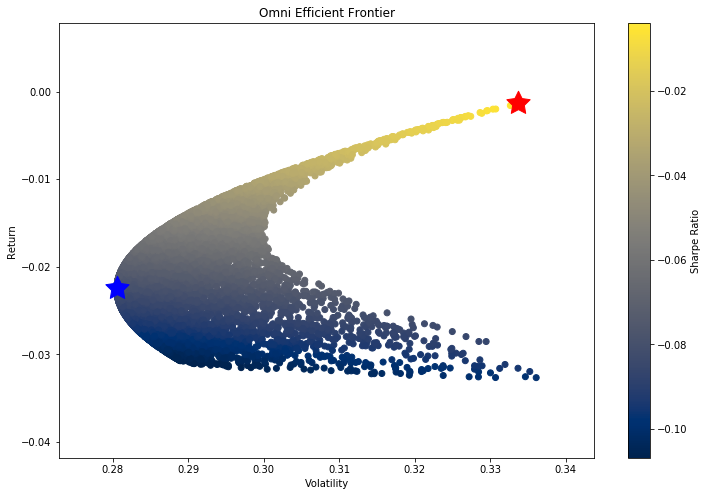

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
plt.scatter(x=result['sd'],y=result['mean'],c=result['Sharpe'],cmap='cividis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.title('Omni Efficient Frontier')
#Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
plt.scatter(Max_Sharpe[1],Max_Sharpe[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(Min_SD[1],Min_SD[0],marker=(5,1,0),color='b',s=600)
plt.show()

In [64]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
start = dt.datetime(2017,5,29).date()
end = dt.datetime(2020,6,29).date()

tickers=['HDFCBANK.NS', 'KOTAKBANK.NS', 'ICICIBANK.NS']

DF =pd.DataFrame()

for i in tickers:
    df = yf.download(i,start,end)[['Adj Close']].pct_change()
    df.columns = [i]                         
    DF = pd.concat([DF,df],axis =1)

df = DF.copy().round(5)
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,HDFCBANK.NS,KOTAKBANK.NS,ICICIBANK.NS
Date,,,
2017-05-29,NaN,NaN,NaN
2017-05-30,-0.00175,-0.00681,0.02064
2017-05-31,0.00439,0.00426,0.01571
2017-06-01,-0.00464,-0.00352,-0.01945
2017-06-02,0.00347,0.00270,-0.00609
...,...,...,...
2020-06-22,-0.00445,0.04058,0.01031
2020-06-23,0.01317,0.02549,0.02340
2020-06-24,-0.00940,-0.03310,-0.07457


In [65]:
mean_returns = df.mean() 
cov_matrix = df.cov()




print(mean_returns)
print(cov_matrix)

HDFCBANK.NS     0.000505
KOTAKBANK.NS    0.000619
ICICIBANK.NS    0.000597
dtype: float64
              HDFCBANK.NS  KOTAKBANK.NS  ICICIBANK.NS
HDFCBANK.NS      0.000269      0.000212      0.000215
KOTAKBANK.NS     0.000212      0.000372      0.000209
ICICIBANK.NS     0.000215      0.000209      0.000571


In [66]:
num_runs = 10000 # number of rows/iterations
result = np.zeros((num_runs,(len(tickers)+3)))
result

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [67]:
for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(tickers))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_return = portfolio_return * 252
    
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
    portfolio_std_dev = portfolio_std_dev * np.sqrt(252)
    
    Sharpe = portfolio_return /  portfolio_std_dev
    
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] =  portfolio_return
    result[i,1] = portfolio_std_dev
    result[i,2] = Sharpe
    
    for j in range(len(tickers)):
        result[i,j+3]= weights[j]

In [68]:
result

array([[0.14365695, 0.28958648, 0.49607616, 0.32226561, 0.11880533,
        0.55892906],
       [0.15361415, 0.28270499, 0.54337261, 0.02132188, 0.66551548,
        0.31316265],
       [0.14861265, 0.32772869, 0.45346244, 0.11017927, 0.1223318 ,
        0.76748893],
       ...,
       [0.14463947, 0.27056867, 0.53457581, 0.3157102 , 0.27249668,
        0.41179312],
       [0.14442071, 0.25975046, 0.55599789, 0.3839527 , 0.52614485,
        0.08990246],
       [0.14271259, 0.25842198, 0.55224634, 0.40840076, 0.31520993,
        0.2763893 ]])

In [69]:
# Converting 'result' into a DataFrame
columns = ['mean','sd','Sharpe'] + tickers
columns

['mean', 'sd', 'Sharpe', 'HDFCBANK.NS', 'KOTAKBANK.NS', 'ICICIBANK.NS']

In [70]:
result = pd.DataFrame(result,columns=columns)
result

,mean,sd,Sharpe,HDFCBANK.NS,KOTAKBANK.NS,ICICIBANK.NS
0,0.143657,0.289586,0.496076,0.322266,0.118805,0.558929
1,0.153614,0.282705,0.543373,0.021322,0.665515,0.313163
2,0.148613,0.327729,0.453462,0.110179,0.122332,0.767489
3,0.137448,0.257283,0.534231,0.592082,0.132133,0.275784
4,0.142700,0.259043,0.550875,0.406690,0.305539,0.287771
...,...,...,...,...,...,...
9995,0.139007,0.258826,0.537067,0.532774,0.165142,0.302084
9996,0.148841,0.318815,0.466855,0.110991,0.168074,0.720935
9997,0.144639,0.270569,0.534576,0.315710,0.272497,0.411793
9998,0.144421,0.259750,0.555998,0.383953,0.526145,0.089902


In [71]:
Max_Sharpe = result.iloc[result['Sharpe'].idxmax()]
print(Max_Sharpe)

Min_SD = result.iloc[result['sd'].idxmin()]
print(Min_SD)

mean            0.144574
sd              0.258298
Sharpe          0.559716
HDFCBANK.NS     0.361662
KOTAKBANK.NS    0.458410
ICICIBANK.NS    0.179928
Name: 956, dtype: float64
mean            0.136275
sd              0.250931
Sharpe          0.543078
HDFCBANK.NS     0.665316
KOTAKBANK.NS    0.230512
ICICIBANK.NS    0.104172
Name: 9593, dtype: float64


In [72]:
result.iloc[956]

mean            0.147758
sd              0.268659
Sharpe          0.549983
HDFCBANK.NS     0.221151
KOTAKBANK.NS    0.442354
ICICIBANK.NS    0.336495
Name: 9157, dtype: float64

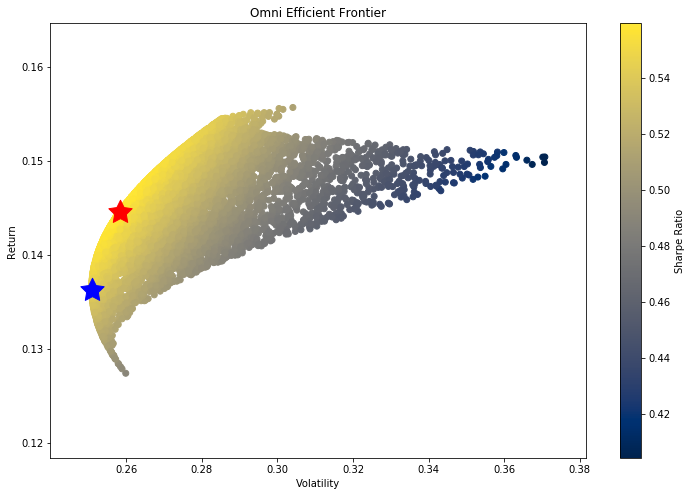

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
plt.scatter(x=result['sd'],y=result['mean'],c=result['Sharpe'],cmap='cividis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.title('Omni Efficient Frontier')
#Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
plt.scatter(Max_Sharpe[1],Max_Sharpe[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(Min_SD[1],Min_SD[0],marker=(5,1,0),color='b',s=600)
plt.show()

In [118]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
start = dt.datetime(2017,5,29).date()
end = dt.datetime(2020,6,29).date()

tickers=['BAJAJFINSV.NS', 'BAJFINANCE.NS', 'MUTHOOTFIN.NS']

DF =pd.DataFrame()

for i in tickers:
    df = yf.download(i,start,end)[['Adj Close']].pct_change()
    df.columns = [i]                         
    DF = pd.concat([DF,df],axis =1)

df = DF.copy().round(5)
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,BAJAJFINSV.NS,BAJFINANCE.NS,MUTHOOTFIN.NS
Date,,,
2017-05-29,NaN,NaN,NaN
2017-05-30,0.03913,0.01078,0.01036
2017-05-31,0.00903,0.00409,0.04455
2017-06-01,0.00324,0.00030,-0.00654
2017-06-02,0.02383,0.02554,0.04452
...,...,...,...
2020-06-22,0.04809,0.05251,-0.01898
2020-06-23,0.02201,0.06520,-0.02531
2020-06-24,-0.04329,-0.03009,-0.01378


In [119]:
mean_returns = df.mean() 
cov_matrix = df.cov()




print(mean_returns)
print(cov_matrix)

BAJAJFINSV.NS    0.000833
BAJFINANCE.NS    0.001450
MUTHOOTFIN.NS    0.001811
dtype: float64
               BAJAJFINSV.NS  BAJFINANCE.NS  MUTHOOTFIN.NS
BAJAJFINSV.NS       0.000593       0.000545       0.000309
BAJFINANCE.NS       0.000545       0.000752       0.000339
MUTHOOTFIN.NS       0.000309       0.000339       0.000738


In [120]:
num_runs = 10000 # number of rows/iterations
result = np.zeros((num_runs,(len(tickers)+3)))
result

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [121]:
for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(tickers))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_return = portfolio_return * 252
    
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
    portfolio_std_dev = portfolio_std_dev * np.sqrt(252)
    
    Sharpe = portfolio_return /  portfolio_std_dev
    
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] =  portfolio_return
    result[i,1] = portfolio_std_dev
    result[i,2] = Sharpe
    
    for j in range(len(tickers)):
        result[i,j+3]= weights[j]

In [122]:
result

array([[0.40244562, 0.37012177, 1.08733301, 0.0129976 , 0.55743901,
        0.4295634 ],
       [0.33315912, 0.37913721, 0.87872969, 0.28711462, 0.576267  ,
        0.13661837],
       [0.34275838, 0.38838292, 0.88252689, 0.21380699, 0.66933315,
        0.11685986],
       ...,
       [0.32995741, 0.35404177, 0.9319731 , 0.39743575, 0.31268857,
        0.28987567],
       [0.30048661, 0.37170195, 0.80840741, 0.48304264, 0.40461257,
        0.11234478],
       [0.39319248, 0.36259559, 1.08438296, 0.17315347, 0.22538496,
        0.60146156]])

In [123]:
# Converting 'result' into a DataFrame
columns = ['mean','sd','Sharpe'] + tickers
columns

['mean', 'sd', 'Sharpe', 'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'MUTHOOTFIN.NS']

In [124]:
result = pd.DataFrame(result,columns=columns)
result

,mean,sd,Sharpe,BAJAJFINSV.NS,BAJFINANCE.NS,MUTHOOTFIN.NS
0,0.402446,0.370122,1.087333,0.012998,0.557439,0.429563
1,0.333159,0.379137,0.878730,0.287115,0.576267,0.136618
2,0.342758,0.388383,0.882527,0.213807,0.669333,0.116860
3,0.282839,0.364513,0.775938,0.609227,0.256764,0.134009
4,0.284275,0.385245,0.737909,0.535345,0.441064,0.023591
...,...,...,...,...,...,...
9995,0.323144,0.354416,0.911764,0.429760,0.300001,0.270240
9996,0.343054,0.348968,0.983051,0.399830,0.162336,0.437834
9997,0.329957,0.354042,0.931973,0.397436,0.312689,0.289876
9998,0.300487,0.371702,0.808407,0.483043,0.404613,0.112345


In [125]:
Max_Sharpe = result.iloc[result['Sharpe'].idxmax()]
print(Max_Sharpe)

Min_SD = result.iloc[result['sd'].idxmin()]
print(Min_SD)

mean             0.426966
sd               0.377426
Sharpe           1.131259
BAJAJFINSV.NS    0.001756
BAJFINANCE.NS    0.318513
MUTHOOTFIN.NS    0.679732
Name: 2524, dtype: float64
mean             0.317147
sd               0.347327
Sharpe           0.913106
BAJAJFINSV.NS    0.539970
BAJFINANCE.NS    0.067434
MUTHOOTFIN.NS    0.392596
Name: 2499, dtype: float64


In [126]:
result.iloc[2524]

mean             0.426966
sd               0.377426
Sharpe           1.131259
BAJAJFINSV.NS    0.001756
BAJFINANCE.NS    0.318513
MUTHOOTFIN.NS    0.679732
Name: 2524, dtype: float64

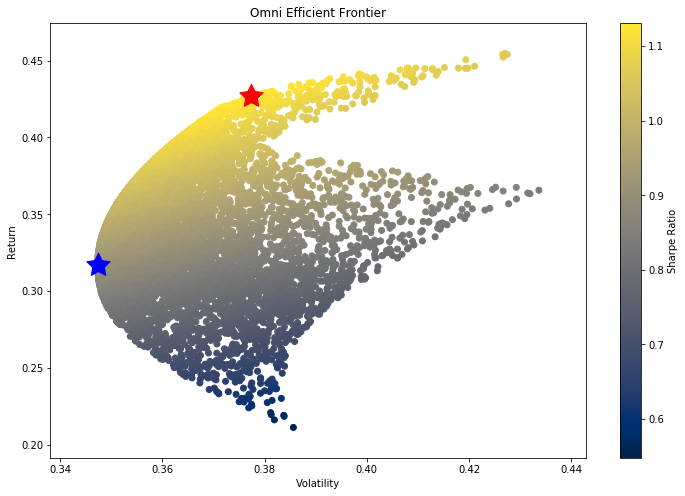

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
plt.scatter(x=result['sd'],y=result['mean'],c=result['Sharpe'],cmap='cividis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.title('Omni Efficient Frontier')
#Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
plt.scatter(Max_Sharpe[1],Max_Sharpe[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(Min_SD[1],Min_SD[0],marker=(5,1,0),color='b',s=600)
plt.show()

In [87]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
start = dt.datetime(2017,5,29).date()
end = dt.datetime(2020,6,29).date()

tickers=['PFIZER.NS', 'ASTRAZEN.NS', 'GLAXO.NS']

DF =pd.DataFrame()

for i in tickers:
    df = yf.download(i,start,end)[['Adj Close']].pct_change()
    df.columns = [i]                         
    DF = pd.concat([DF,df],axis =1)

df = DF.copy().round(5)
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,PFIZER.NS,ASTRAZEN.NS,GLAXO.NS
Date,,,
2017-05-29,NaN,NaN,NaN
2017-05-30,-0.00302,-0.00200,0.02555
2017-05-31,0.01114,0.00584,0.01678
2017-06-01,0.03079,0.00710,0.01365
2017-06-02,-0.01712,-0.00118,0.00164
...,...,...,...
2020-06-22,-0.00548,-0.00848,0.05103
2020-06-23,0.00367,-0.00110,0.05106
2020-06-24,-0.00026,0.02894,-0.03111


In [88]:
mean_returns = df.mean() 
cov_matrix = df.cov()




print(mean_returns)
print(cov_matrix)

PFIZER.NS      0.001506
ASTRAZEN.NS    0.002080
GLAXO.NS       0.000564
dtype: float64
             PFIZER.NS  ASTRAZEN.NS  GLAXO.NS
PFIZER.NS     0.000365     0.000125  0.000085
ASTRAZEN.NS   0.000125     0.000757  0.000124
GLAXO.NS      0.000085     0.000124  0.000272


In [89]:
num_runs = 10000 # number of rows/iterations
result = np.zeros((num_runs,(len(tickers)+3)))
result

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [90]:
for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(tickers))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_return = portfolio_return * 252
    
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
    portfolio_std_dev = portfolio_std_dev * np.sqrt(252)
    
    Sharpe = portfolio_return /  portfolio_std_dev
    
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] =  portfolio_return
    result[i,1] = portfolio_std_dev
    result[i,2] = Sharpe
    
    for j in range(len(tickers)):
        result[i,j+3]= weights[j]

In [91]:
result

array([[0.47310842, 0.33887608, 1.3961104 , 0.25865487, 0.70589688,
        0.03544825],
       [0.36859225, 0.25219843, 1.46151684, 0.32047043, 0.39388775,
        0.28564183],
       [0.31734026, 0.24143393, 1.31439794, 0.67232959, 0.04111929,
        0.28655112],
       ...,
       [0.34930432, 0.24388573, 1.43224582, 0.29914029, 0.35664713,
        0.34421258],
       [0.25251311, 0.24564643, 1.02795351, 0.03607993, 0.26669648,
        0.69722359],
       [0.35384637, 0.25677292, 1.37805175, 0.2134824 , 0.42175415,
        0.36476346]])

In [92]:
# Converting 'result' into a DataFrame
columns = ['mean','sd','Sharpe'] + tickers
columns

['mean', 'sd', 'Sharpe', 'PFIZER.NS', 'ASTRAZEN.NS', 'GLAXO.NS']

In [93]:
result = pd.DataFrame(result,columns=columns)
result

,mean,sd,Sharpe,PFIZER.NS,ASTRAZEN.NS,GLAXO.NS
0,0.473108,0.338876,1.396110,0.258655,0.705897,0.035448
1,0.368592,0.252198,1.461517,0.320470,0.393888,0.285642
2,0.317340,0.241434,1.314398,0.672330,0.041119,0.286551
3,0.389332,0.254337,1.530775,0.458760,0.362267,0.178974
4,0.291179,0.262466,1.109397,0.005460,0.386939,0.607600
...,...,...,...,...,...,...
9995,0.370888,0.245841,1.508651,0.422849,0.336293,0.240857
9996,0.263734,0.222577,1.184912,0.467908,0.027788,0.504303
9997,0.349304,0.243886,1.432246,0.299140,0.356647,0.344213
9998,0.252513,0.245646,1.027954,0.036080,0.266696,0.697224


In [94]:
Max_Sharpe = result.iloc[result['Sharpe'].idxmax()]
print(Max_Sharpe)

Min_SD = result.iloc[result['sd'].idxmin()]
print(Min_SD)

mean           0.435467
sd             0.279557
Sharpe         1.557704
PFIZER.NS      0.606909
ASTRAZEN.NS    0.390998
GLAXO.NS       0.002093
Name: 8288, dtype: float64
mean           0.266125
sd             0.218659
Sharpe         1.217078
PFIZER.NS      0.362491
ASTRAZEN.NS    0.099539
GLAXO.NS       0.537969
Name: 13, dtype: float64


In [98]:
result.iloc[8288]

mean           0.435467
sd             0.279557
Sharpe         1.557704
PFIZER.NS      0.606909
ASTRAZEN.NS    0.390998
GLAXO.NS       0.002093
Name: 8288, dtype: float64

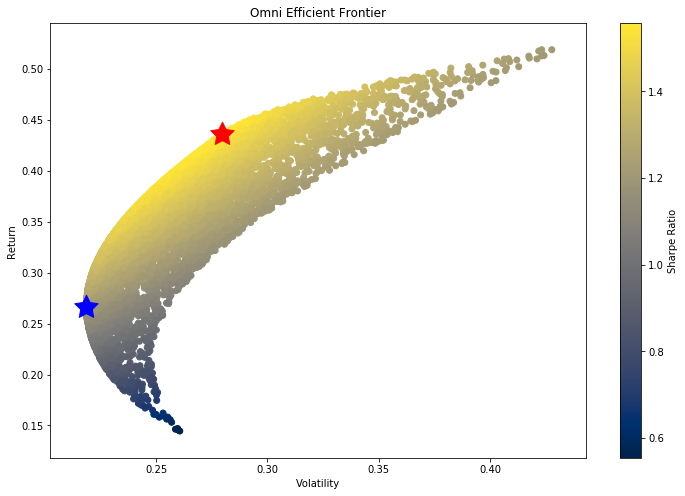

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
plt.scatter(x=result['sd'],y=result['mean'],c=result['Sharpe'],cmap='cividis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.title('Omni Efficient Frontier')
#Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
plt.scatter(Max_Sharpe[1],Max_Sharpe[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(Min_SD[1],Min_SD[0],marker=(5,1,0),color='b',s=600)
plt.show()